(A) Identification of Candidate Datasets

Identify three candidate datasets. Each dataset should:

- Align with at least one course topic (e.g., frequent itemsets, graphs, clustering, text, anomaly detection)

- Provide opportunities for at least one beyond-course technique

## (A) Identification of Candidate Datasets (3 options)

### 1) **wiki-Vote (Wikipedia adminship vote network)**

* **What it is (directed):** Nodes are Wikipedia users; a directed edge **i → j** means user *i* voted on user *j* in an admin election. ([Snap][1])
* **Download URL:** `https://snap.stanford.edu/data/wiki-Vote.txt.gz` ([Snap][1])
* **Course-topic fit:** Graph mining (PageRank/HITS, SCC/WCC structure, reciprocity, community detection on directed/undirected variants).
* **Beyond-course opportunity:** **Graph embeddings / link prediction** (node2vec/DeepWalk-style embeddings + predict future votes/edges; or compare embedding similarity vs. classic heuristics). ([Snap][1])

---

### 2) **soc-RedditHyperlinks (Subreddit-to-subreddit hyperlinks)**

* **What it is (directed, signed, temporal, attributed):** Nodes are subreddits; a directed edge **u → v** is a hyperlink from a post in subreddit *u* to a post in subreddit *v*, with **timestamp**, **sentiment label (+1/-1)**, and **text/property features**. ([Snap][2])
* **Download URLs:**

  * `https://snap.stanford.edu/data/soc-redditHyperlinks-title.tsv` ([Snap][2])
  * `https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv` ([Snap][2])
* **Course-topic fit:** Graph mining + clustering (community structure over snapshots) + text/feature-based analysis.
* **Beyond-course opportunity:** **Signed + temporal modeling** (signed link prediction, dynamic community evolution, or temporal graph embeddings/GNN-style approaches). ([Snap][2])

---

### 3) **email-Eu-core-temporal (Email communication over time)**

* **What it is (directed, temporal):** A directed temporal edge **(u, v, t)** means person *u* emailed person *v* at time *t*. ([Snap][3])
* **Download URL:** `https://snap.stanford.edu/data/email-Eu-core-temporal.txt.gz` ([Snap][3])
* **Course-topic fit:** Graph mining + anomaly detection (communication bursts, unusual senders/receivers, structural shifts over time windows).
* **Beyond-course opportunity:** **Temporal motifs / change-point detection** (motif counts over time, detecting regime shifts in communication patterns; or higher-order temporal interaction modeling). ([Snap][3])

---

**Required citation (for your citation cell):**
Jure Leskovec and Andrej Krevl. *SNAP Datasets: Stanford Large Network Dataset Collection.* [http://snap.stanford.edu/data](http://snap.stanford.edu/data). ([Snap][4])

[1]: https://snap.stanford.edu/data/wiki-Vote.html "SNAP: Network datasets: Wikipedia vote network"
[2]: https://snap.stanford.edu/data/soc-RedditHyperlinks.html "SNAP: Social network: Reddit Hyperlink Network"
[3]: https://snap.stanford.edu/data/email-Eu-core-temporal.html "SNAP: Network datasets: email-Eu-core temporal network"
[4]: https://snap.stanford.edu/data/?utm_source=chatgpt.com "Stanford Large Network Dataset Collection"


B) Comparative Analysis of Datasets

Compare the three datasets with respect to both data properties AND course vs external techniques.



## B) Comparative Analysis of the 3 Candidate Datasets

### Quick comparison table (data properties + methods)

| Dataset                    | What the nodes/edges mean                                        | Scale & signals                                                                                              | Cleaning / modeling choices                                                                                                                                   | Course techniques it supports                                                                                                                | Beyond-course technique opportunities                                                                                                                      |
| -------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **wiki-Vote**              | Users; edge *i → j* = user *i* voted on user *j*                 | ~7.1K nodes, ~103.7K edges; static directed network ([Snap][1])                                              | Mostly straightforward edge-list parsing; optional filter to largest WCC/SCC; few attributes                                                                  | SCC/WCC structure, PageRank/HITS, reciprocity, community detection on symmetrized graph ([Snap][1])                                          | Link prediction + graph embeddings (node2vec/DeepWalk), robustness of rankings under edge noise (sensitivity analysis)                                     |
| **email-Eu-core-temporal** | People; edge *(u, v, t)* = u emailed v at time t                 | 986 nodes; 332,334 temporal edges; static projection has 24,929 edges; 803-day span ([Snap][2])              | Need to decide temporal representation (events vs windowed snapshots vs static projection); handle burstiness; possible duplicates per time window            | Temporal snapshots + structural stats, centrality over time, SCC/WCC on projections; anomaly detection (spikes, unusual senders) ([Snap][2]) | Change-point detection, temporal motifs, temporal link prediction (predict next recipients / future edges)                                                 |
| **soc-RedditHyperlinks**   | Subreddits; edge u→v = hyperlink from a post in u to a post in v | 55,863 nodes; 858,490 edges; **signed** (-1/+1), **temporal**, **attributed**; Jan 2014–Apr 2017 ([Snap][3]) | Hardest: repeated interactions, signed labels, timestamps, text-property vectors; must decide aggregation (per month / per quarter / event-level) ([Snap][3]) | Directed graph mining + clustering on snapshots; centrality; evolution of components/communities over time ([Snap][3])                       | Signed modeling (signed link prediction, balance theory checks), dynamic embeddings / temporal graph ML, conflict forecasting using attributes ([Snap][3]) |


---

### What these differences mean (data properties)

If you want a clean “learn the graph first” dataset, **wiki-Vote** is the easiest: it’s a classic directed edge list with moderate size, and you can compute structural stats and rankings quickly. ([Snap][1]) The tradeoff is that it’s mostly *structure only*—so beyond-course methods need to be things like embeddings, robustness/sensitivity analysis, or link prediction from graph-only features.

**email-Eu-core-temporal** adds a strong real-world dimension: **time**. You get the same graph questions (centrality, components), but now you can ask “how do these change week to week?” The key constraint is representation: depending on whether you use event-level edges or time-window snapshots, you can get different answers. ([Snap][2]) This dataset is great if you’re curious about **dynamics, bursts, and anomalies**, but you’ll spend more effort deciding the right temporal modeling approach.

**soc-RedditHyperlinks** is the richest and most flexible: it’s directed **and** temporal **and** signed **and** attributed (text-property vectors). ([Snap][3]) That extra signal unlocks more ambitious questions, like whether negative edges cluster in particular communities, or whether you can predict conflict edges from attributes. The main limitation is complexity: you must make careful aggregation choices (event-level vs snapshots), and signed labels introduce their own assumptions (e.g., class imbalance, label noise). ([Snap][3])

### Course vs. beyond-course fit (tradeoffs)

All three support core course graph techniques (SCC/WCC, PageRank/HITS, degree distributions, basic community structure). The difference is how naturally they support *something beyond the course*:

* **wiki-Vote:** best “beyond-course” path is **graph representation learning** (embeddings) or **link prediction** using structural features.
* **email-Eu-core-temporal:** best “beyond-course” path is **temporal analytics** (change-point detection, motifs, temporal link prediction).
* **soc-RedditHyperlinks:** best “beyond-course” path is **signed + temporal modeling** (signed link prediction, conflict forecasting) and potentially temporal graph ML using attributes. ([Snap][3])

[1]: https://snap.stanford.edu/data/wiki-Vote.html "SNAP: Network datasets: Wikipedia vote network"
[2]: https://snap.stanford.edu/data/email-Eu-core-temporal.html "SNAP: Network datasets: email-Eu-core temporal network"
[3]: https://snap.stanford.edu/data/soc-RedditHyperlinks.html "SNAP: Social network: Reddit Hyperlink Network"
### Comparative table (required dimensions)

| Dimension                       | **wiki-Vote**                                                                                                                                                                                                     | **email-Eu-core-temporal**                                                                                                                                                                                                                | **soc-RedditHyperlinks**                                                                                                                                                                                                                                                |
| ------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Supported data mining tasks** | **Course:** directed graph stats, SCC/WCC, centrality (PageRank/HITS), reciprocity, community detection (on symmetrized graph).  **External:** node embeddings (node2vec/DeepWalk) + link prediction. ([Snap][1]) | **Course:** directed graph stats on static projection, centrality over time windows, anomaly detection via bursty communication patterns.  **External:** change-point detection / temporal motifs / temporal link prediction. ([Snap][2]) | **Course:** directed graph mining + clustering/community structure on snapshots; centrality comparisons over time.  **External:** signed-link modeling (balance/conflict), signed link prediction, dynamic embeddings / temporal graph ML using attributes. ([Snap][3]) |
| **Data quality issues**         | Mostly clean edge list, but **no attributes** and limited context; results are purely structural. Potential duplicate edges or isolated nodes depending on preprocessing. ([Snap][1])                             | Temporal event stream needs **timestamp parsing** and a decision about **aggregation** (event-level vs snapshot vs static projection). Only “core” internal emails are included (missing outside-world comms). ([Snap][2])                | More complex: repeated interactions (multi-edges), **signed labels (-1/+1)** + **text-property vectors**, plus time—requires careful choices about aggregation and handling class imbalance / label noise. ([Snap][3])                                                  |
| **Algorithmic feasibility**     | Very manageable in Colab/NetworkX (≈7k nodes, ≈100k edges). Most algorithms run fast; visualization needs sampling/top-k. ([Snap][1])                                                                             | Node count is small (986), but temporal edges are large (332k). Feasible if you process as **windows** or build a static projection; heavy temporal analyses may need efficient counting but still Colab-friendly. ([sparse.tamu.edu][4]) | Medium-large (≈56k nodes, ≈858k edges). Graph mining is feasible with snapshots/aggregation and efficient tooling; some methods may need sampling or faster libraries (igraph/graph-tool) if you do many windowed runs. ([Snap][3])                                     |
| **Bias considerations**         | Strong **selection bias**: only users involved in adminship voting; active/vocal users overrepresented. Centrality may reflect voting activity rather than “authority.” ([Snap][1])                               | **Coverage bias**: only internal “core” institution emails are present; missing external communications can distort who looks central. Also strong activity bias (some roles email more by job function). ([Snap][2])                     | **Platform + measurement bias**: hyperlinks don’t capture all interactions; negative/positive labels depend on how sentiment was produced and may be noisy. Large subreddits produce more links, inflating apparent influence. ([Snap][3])                              |
| **Ethical considerations**      | Low direct personal risk (public voting context), but still avoid de-anonymizing or “ranking people” in a harmful way; focus on aggregate patterns. ([Snap][1])                                                   | Higher sensitivity: even anonymized email networks involve workplace communication; analyses could reinforce surveillance-like narratives. Be careful not to infer individual behavior/intent. ([Snap][2])                                | Potential harm if results are used to target communities or amplify harassment (“attack” framing exists in the dataset context). Keep analysis at community/aggregate level and avoid naming/labeling small groups. ([Snap][3])                                         |


[1]: https://snap.stanford.edu/data/wiki-Vote.html?utm_source=chatgpt.com "Wikipedia vote network - SNAP: Network datasets"
[2]: https://snap.stanford.edu/data/email-Eu-core-temporal.html?utm_source=chatgpt.com "email-Eu-core temporal network - SNAP: Network datasets"
[3]: https://snap.stanford.edu/data/soc-RedditHyperlinks.html?utm_source=chatgpt.com "Social network: Reddit Hyperlink Network - SNAP: Stanford"
[4]: https://sparse.tamu.edu/SNAP/email-Eu-core-temporal?utm_source=chatgpt.com "SNAP/email-Eu-core-temporal - SuiteSparse Matrix Collection"


(C) Dataset Selection

Select one dataset and justify the choice

## (C) Dataset Selection

### Selected dataset: **soc-RedditHyperlinks (Subreddit-to-subreddit hyperlink network)**

**What it is:** A directed network where an edge **u → v** means a post in subreddit *u* links to subreddit *v*. The dataset includes **timestamps**, a **signed label (+1 / −1)**, and **text-property feature vectors**, so it’s not just structure-only. ([Snap][1])

### Reasons (why I chose it)

* **Directly supports course graph techniques:** I can do directed structural mining (|V|, |E|, SCC/WCC, reciprocity), run **PageRank/HITS**, and examine community structure on time-window snapshots (monthly/quarterly). ([Snap][1])
* **Strong “beyond-course” opportunity:** Because edges are **signed + temporal + attributed**, I can go beyond basic graph stats into **signed link prediction** (predict positive vs negative links), **temporal modeling** (how conflict/attention shifts over time), or **dynamic embeddings** for downstream prediction. ([Snap][1])
* **Richer story than static edge lists:** Unlike pure edge-list datasets, I can compare multiple representations—event stream vs snapshots vs aggregated weighted graph—and show how modeling choices change conclusions (a real data mining tradeoff). ([Snap][1])

### Trade-offs (limitations / constraints)

* **More preprocessing decisions:** There are many repeated interactions between the same pair over time, so I must choose an aggregation strategy (event-level vs time-window snapshots vs collapsed weighted edges). Different choices can lead to different “communities” and rankings. ([Snap][1])
* **Label and activity bias risks:** Large subreddits generate more posts/links, which can inflate centrality; signed labels can be noisy or imbalanced, so evaluation needs care (e.g., stratified splits, baseline comparisons). ([Snap][1])
* **Heavier compute than wiki-Vote/email-core:** It’s still feasible in Colab, but some repeated snapshot experiments may require sampling or efficient libraries if I run many time windows. ([Snap][1])


[1]: https://snap.stanford.edu/data/soc-RedditHyperlinks.html?utm_source=chatgpt.com "Social network: Reddit Hyperlink Network - SNAP: Stanford"


I’ll select **soc-RedditHyperlinks** because it directly supports **course graph mining** (directed structural stats, SCC/WCC, reciprocity, and centrality like PageRank/HITS on time-window snapshots) while also enabling a clear **beyond-course technique**: **signed, temporal link prediction** (predict whether a future cross-subreddit link will be positive vs. negative using past graph structure and the provided text/property features). The main tradeoff is higher preprocessing and modeling complexity—multiple interactions over time require careful aggregation choices (event stream vs. monthly snapshots), and signed labels plus activity skew can introduce bias, so I’ll use stratified evaluation and robustness checks to make conclusions reliable.


(D) Exploratory Data Analysis (Selected Dataset Only)



EDA checklist (retail-style → RedditHyperlinks equivalent)
1) Distribution of “basket sizes”

Retail meaning: #items per transaction
Here: treat each POST_ID as a transaction and count how many distinct targets it links to.

What to report:

Histogram of basket_size = #unique TARGET_SUBREDDIT per POST_ID

Mean/median/p95 basket size

How often posts link to 1 vs many subreddits

Already exists: data/soc-redditHyperlinks-title.tsv
Rows: 571927
Columns: ['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP', 'POST_LABEL', 'POST_PROPERTIES']

Missing fraction by column:


,missing_frac
SOURCE_SUBREDDIT,0.0
TARGET_SUBREDDIT,0.0
POST_ID,0.0
TIMESTAMP,0.0
POST_LABEL,0.0
POST_PROPERTIES,0.0



All timestamps parsed successfully.
Time range: 2013-12-31 16:20:20+00:00 → 2017-04-30 16:47:50+00:00

Self-links (source==target): 0 (0.0000%)

Exact duplicate rows: 0 (0.0000%)

POST_LABEL counts:


,count,fraction
POST_LABEL,,
1,510787,0.893098
-1,61140,0.106902



Unique sources: 43695
Unique targets: 26888
Unique nodes (union): 54075
Unique posts: 571922
=== Basket size per post (unique targets per POST_ID) ===


,count,mean,std,min,50%,90%,95%,99%,max
basket_size,571922.0,1.000009,0.002957,1.0,1.0,1.0,1.0,1.0,2.0


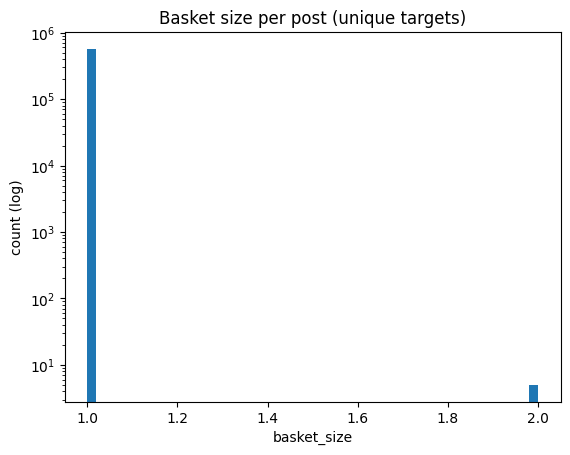


=== Top sources / targets ===


,outgoing_edges
SOURCE_SUBREDDIT,
subredditdrama,22971
bestof,21170
titlegore,9500
shitredditsays,7338
shitpost,6657
circlebroke2,6037
switcharoo,5997
shitamericanssay,5482
drama,5478


,incoming_edges
TARGET_SUBREDDIT,
askreddit,19293
pics,9799
iama,9752
todayilearned,8753
funny,8731
worldnews,7687
videos,7567
news,5928
politics,4860



=== Sparsity / unique directed pairs (u,v) ===
unique nodes: 54075
unique directed pairs: 234792
unique-pair density: 8.029680598483293e-05


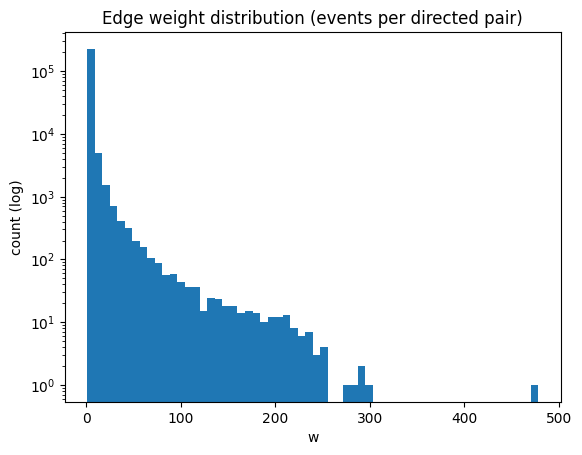


=== Temporal activity (monthly) ===


/tmp/ipython-input-176429720.py:154: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2["month"] = df2["TIMESTAMP"].dt.to_period("M").dt.to_timestamp()
/tmp/ipython-input-176429720.py:157: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  active_nodes_per_month = df2.groupby("month").apply(


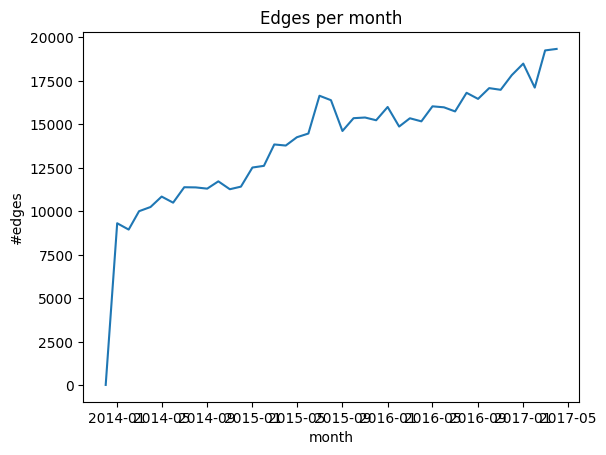

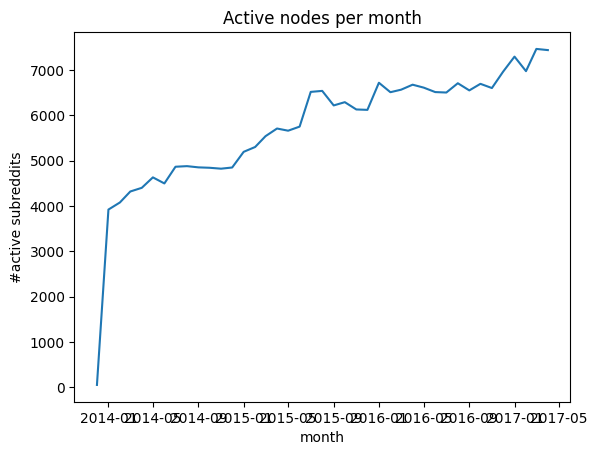


=== Signed label drift: negative rate (monthly) ===


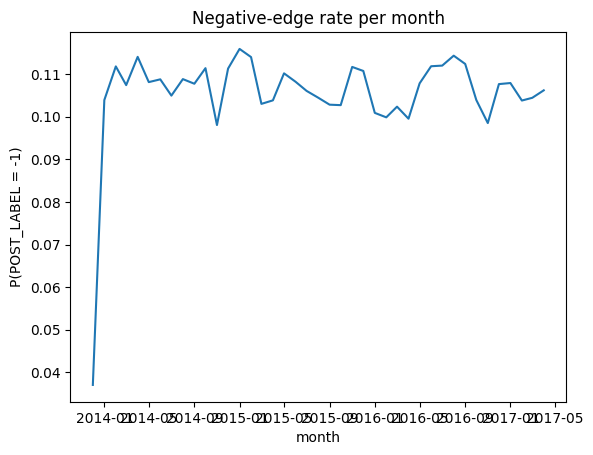

,num_nodes,num_edges,avg_in_degree,avg_out_degree,num_scc,largest_scc,num_wcc,largest_wcc,density,reciprocity
0,54075,234792,4.341969,4.341969,39530,14389,758,52468,0.00008,0.124715


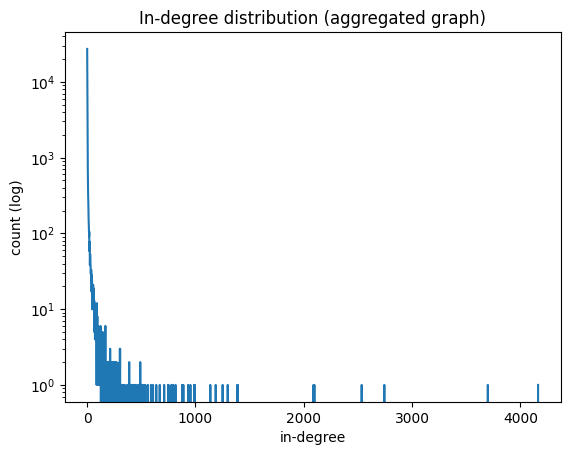

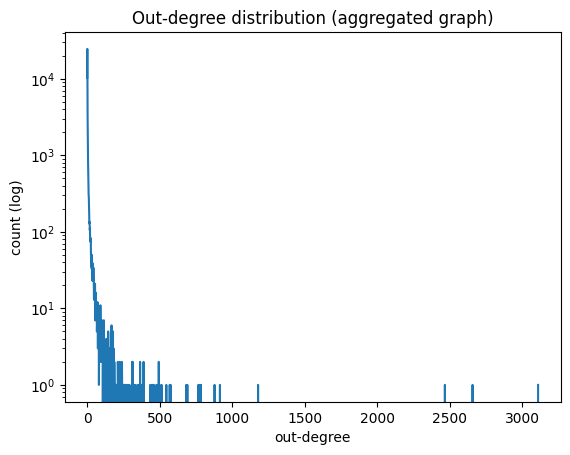

In [6]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ---- Download (pick ONE file to start; title is often smaller than body) ----
TITLE_URL = "https://snap.stanford.edu/data/soc-redditHyperlinks-title.tsv"
BODY_URL  = "https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv"
os.makedirs("data", exist_ok=True)

def download(url, path):
    import urllib.request
    if os.path.exists(path) and os.path.getsize(path) > 0:
        print("Already exists:", path)
        return
    print("Downloading:", url)
    urllib.request.urlretrieve(url, path)
    print("Saved:", path, "MB =", os.path.getsize(path)/(1024*1024))

def load_reddit_hyperlinks(path: str) -> pd.DataFrame:
    # Detect header by peeking first line
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        first_line = f.readline()

    has_header = ("SOURCE_SUBREDDIT" in first_line) or ("LINK_SENTIMENT" in first_line)

    if has_header:
        df = pd.read_csv(path, sep="\t", header=0, dtype=str, low_memory=False)
    else:
        df = pd.read_csv(
            path, sep="\t", header=None,
            names=["SOURCE_SUBREDDIT","TARGET_SUBREDDIT","POST_ID","TIMESTAMP","POST_LABEL","POST_PROPERTIES"],
            dtype=str, low_memory=False
        )

    # Normalize column names
    df.columns = [c.strip().upper() for c in df.columns]

    # SNAP file uses LINK_SENTIMENT + PROPERTIES in header
    rename_map = {
        "LINK_SENTIMENT": "POST_LABEL",
        "PROPERTIES": "POST_PROPERTIES",
    }
    df = df.rename(columns=rename_map)

    required = ["SOURCE_SUBREDDIT","TARGET_SUBREDDIT","POST_ID","TIMESTAMP","POST_LABEL","POST_PROPERTIES"]
    missing = [c for c in required if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}. Found: {df.columns.tolist()[:20]}")

    df = df[required].copy()

    # Cast label safely (do NOT cast during read_csv)
    df["POST_LABEL"] = pd.to_numeric(df["POST_LABEL"], errors="coerce")

    # Parse timestamp robustly
    ts_num = pd.to_numeric(df["TIMESTAMP"], errors="coerce")
    if ts_num.notna().mean() > 0.9:
        med = float(ts_num.median())
        # UNIX seconds are ~1e9, milliseconds ~1e12
        if med > 1e12:
            df["TIMESTAMP"] = pd.to_datetime(ts_num, unit="ms", utc=True, errors="coerce")
        else:
            df["TIMESTAMP"] = pd.to_datetime(ts_num, unit="s", utc=True, errors="coerce")
    else:
        df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"], utc=True, errors="coerce")

    # Use nice dtypes (nullable int)
    df["SOURCE_SUBREDDIT"] = df["SOURCE_SUBREDDIT"].astype("string")
    df["TARGET_SUBREDDIT"] = df["TARGET_SUBREDDIT"].astype("string")
    df["POST_ID"] = df["POST_ID"].astype("string")
    df["POST_PROPERTIES"] = df["POST_PROPERTIES"].astype("string")
    df["POST_LABEL"] = df["POST_LABEL"].astype("Int8")  # nullable int8

    return df

# ---- Cleaning (minimal, EDA-friendly) ----
def clean_reddit_hyperlinks(df: pd.DataFrame,
                            drop_bad_timestamps: bool = True,
                            drop_self_links: bool = True,
                            drop_duplicates: bool = True) -> pd.DataFrame:
    """
    Minimal cleaning for analysis. Keeps only rows with valid timestamps, removes self-links and duplicates.
    """
    out = df.copy()

    if drop_bad_timestamps:
        out = out[out["TIMESTAMP"].notna()]

    if drop_self_links:
        out = out[out["SOURCE_SUBREDDIT"] != out["TARGET_SUBREDDIT"]]

    if drop_duplicates:
        out = out.drop_duplicates()

    # Ensure labels are only -1 or +1 if any weird values show up
    out = out[out["POST_LABEL"].isin([-1, 1])]

    return out


# ---- Retail-style EDA metrics mapped to this dataset ----
def eda_core(df: pd.DataFrame, topk: int = 20):
    """
    Produces:
      - basket size distribution (unique targets per POST_ID)
      - top source/target frequencies
      - adjacency sparsity via unique (u,v) pairs + edge weight distribution
      - temporal activity: edges/month + active nodes/month
      - signed label drift: negative rate/month
    """
    print("=== Basket size per post (unique targets per POST_ID) ===")
    basket = (df.groupby("POST_ID")["TARGET_SUBREDDIT"].nunique()
              .rename("basket_size"))
    display(basket.describe(percentiles=[0.5, 0.9, 0.95, 0.99]).to_frame().T)

    plt.figure()
    plt.hist(basket.values, bins=50)
    plt.yscale("log")
    plt.title("Basket size per post (unique targets)")
    plt.xlabel("basket_size")
    plt.ylabel("count (log)")
    plt.show()

    print("\n=== Top sources / targets ===")
    top_src = df["SOURCE_SUBREDDIT"].value_counts().head(topk).to_frame("outgoing_edges")
    top_tgt = df["TARGET_SUBREDDIT"].value_counts().head(topk).to_frame("incoming_edges")
    display(top_src)
    display(top_tgt)

    print("\n=== Sparsity / unique directed pairs (u,v) ===")
    pairs = df.groupby(["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"]).size().rename("w").reset_index()
    nodes = pd.Index(pd.concat([df["SOURCE_SUBREDDIT"], df["TARGET_SUBREDDIT"]]).unique()).size
    m_unique = len(pairs)
    density_unique = m_unique / (nodes * (nodes - 1)) if nodes > 1 else 0.0
    print("unique nodes:", nodes)
    print("unique directed pairs:", m_unique)
    print("unique-pair density:", density_unique)

    plt.figure()
    plt.hist(pairs["w"], bins=60)
    plt.yscale("log")
    plt.title("Edge weight distribution (events per directed pair)")
    plt.xlabel("w")
    plt.ylabel("count (log)")
    plt.show()

    print("\n=== Temporal activity (monthly) ===")
    df2 = df.copy()
    df2["month"] = df2["TIMESTAMP"].dt.to_period("M").dt.to_timestamp()

    edges_per_month = df2.groupby("month").size()
    active_nodes_per_month = df2.groupby("month").apply(
        lambda x: pd.Index(pd.concat([x["SOURCE_SUBREDDIT"], x["TARGET_SUBREDDIT"]]).unique()).size
    )

    plt.figure()
    plt.plot(edges_per_month.index, edges_per_month.values)
    plt.title("Edges per month")
    plt.xlabel("month")
    plt.ylabel("#edges")
    plt.show()

    plt.figure()
    plt.plot(active_nodes_per_month.index, active_nodes_per_month.values)
    plt.title("Active nodes per month")
    plt.xlabel("month")
    plt.ylabel("#active subreddits")
    plt.show()

    print("\n=== Signed label drift: negative rate (monthly) ===")
    neg_rate = df2.groupby("month")["POST_LABEL"].apply(lambda s: (s == -1).mean())

    plt.figure()
    plt.plot(neg_rate.index, neg_rate.values)
    plt.title("Negative-edge rate per month")
    plt.xlabel("month")
    plt.ylabel("P(POST_LABEL = -1)")
    plt.show()

    return {
        "basket_stats": basket.describe().to_dict(),
        "unique_nodes": int(nodes),
        "unique_pairs": int(m_unique),
        "unique_pair_density": float(density_unique),
        "top_sources": top_src,
        "top_targets": top_tgt,
        "edges_per_month": edges_per_month,
        "active_nodes_per_month": active_nodes_per_month,
        "neg_rate_per_month": neg_rate,
    }


# ---- Build an aggregated directed graph for structural EDA (SCC/WCC, degrees, PR-ready) ----
def build_aggregated_graph(df: pd.DataFrame, use_signed_weight: bool = False) -> nx.DiGraph:
    """
    Aggregates event edges into a single directed graph:
      - Default: weight = count of events for (u,v)
      - If use_signed_weight: weight = sum(label) for (u,v) so negative links reduce weight
        (still store count separately)
    """
    g = nx.DiGraph()

    agg = df.groupby(["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"]).agg(
        w_count=("POST_ID", "size"),
        w_signed=("POST_LABEL", "sum")
    ).reset_index()

    for u, v, c, s in agg.itertuples(index=False):
        g.add_edge(u, v, weight=float(s if use_signed_weight else c), count=int(c), signed_sum=int(s))

    return g


def structural_eda(G: nx.DiGraph, plot: bool = True):
    n = G.number_of_nodes()
    m = G.number_of_edges()

    in_degs = np.fromiter((d for _, d in G.in_degree()), dtype=np.int64, count=n) if n else np.array([], dtype=np.int64)
    out_degs = np.fromiter((d for _, d in G.out_degree()), dtype=np.int64, count=n) if n else np.array([], dtype=np.int64)

    scc_sizes = [len(c) for c in nx.strongly_connected_components(G)] if n else []
    wcc_sizes = [len(c) for c in nx.weakly_connected_components(G)] if n else []

    stats = {
        "num_nodes": n,
        "num_edges": m,
        "avg_in_degree": float(in_degs.mean()) if n else 0.0,
        "avg_out_degree": float(out_degs.mean()) if n else 0.0,
        "num_scc": len(scc_sizes),
        "largest_scc": max(scc_sizes) if scc_sizes else 0,
        "num_wcc": len(wcc_sizes),
        "largest_wcc": max(wcc_sizes) if wcc_sizes else 0,
        "density": float(nx.density(G)) if n else 0.0,
        "reciprocity": None if nx.reciprocity(G) is None else float(nx.reciprocity(G)),
    }
    display(pd.DataFrame([stats]))

    if plot and n:
        def plot_deg(degs, title, xlabel):
            maxd = int(degs.max()) if len(degs) else 0
            counts = np.bincount(degs, minlength=maxd + 1)
            x = np.arange(len(counts))
            plt.figure()
            plt.plot(x, counts)
            plt.yscale("log")
            plt.title(title)
            plt.xlabel(xlabel)
            plt.ylabel("count (log)")
            plt.show()

        plot_deg(in_degs, "In-degree distribution (aggregated graph)", "in-degree")
        plot_deg(out_degs, "Out-degree distribution (aggregated graph)", "out-degree")

    return stats

download(TITLE_URL, "data/soc-redditHyperlinks-title.tsv")
df = load_reddit_hyperlinks("data/soc-redditHyperlinks-title.tsv")
q = eda_quality(df)
dfc = clean_reddit_hyperlinks(df)
results = eda_core(dfc)
G = build_aggregated_graph(dfc, use_signed_weight=False)
gstats = structural_eda(G)


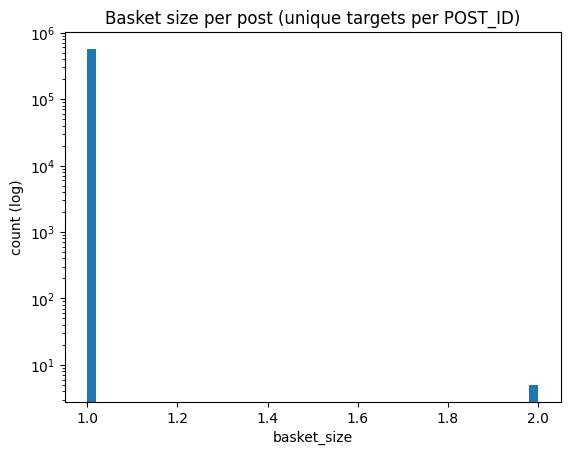

In [8]:
basket = (df.groupby("POST_ID")["TARGET_SUBREDDIT"]
            .nunique()
            .rename("basket_size")
            .reset_index())
basket["basket_size"].describe()

plt.figure()
plt.hist(basket["basket_size"], bins=50)
plt.yscale("log")
plt.title("Basket size per post (unique targets per POST_ID)")
plt.xlabel("basket_size")
plt.ylabel("count (log)")
plt.show()


2) Frequency of top “items”

Retail meaning: most frequent items
Here: most frequent source subreddits and target subreddits (by hyperlink count).

What to report:

Top 20 sources by outgoing hyperlink count

Top 20 targets by incoming hyperlink count

(Optional) Compare overlap: are the biggest sources also the biggest targets?

In [9]:
top_src = df["SOURCE_SUBREDDIT"].value_counts().head(20)
top_tgt = df["TARGET_SUBREDDIT"].value_counts().head(20)

display(top_src.to_frame("outgoing_edges"))
display(top_tgt.to_frame("incoming_edges"))


,outgoing_edges
SOURCE_SUBREDDIT,
subredditdrama,22971
bestof,21170
titlegore,9500
shitredditsays,7338
shitpost,6657
circlebroke2,6037
switcharoo,5997
shitamericanssay,5482
drama,5478


,incoming_edges
TARGET_SUBREDDIT,
askreddit,19293
pics,9799
iama,9752
todayilearned,8753
funny,8731
worldnews,7687
videos,7567
news,5928
politics,4860


3) Sparsity of “item co-occurrence”

Retail meaning: co-occurrence matrix is sparse
Here: two good choices:

A) Graph sparsity: how sparse is the subreddit→subreddit adjacency?

Unique directed pairs / possible pairs = density (on the active node set)

Distribution of edge weights if you aggregate multiple events into (u,v) counts

unique nodes: 54075 unique directed pairs: 234792 density: 8.029680598483293e-05


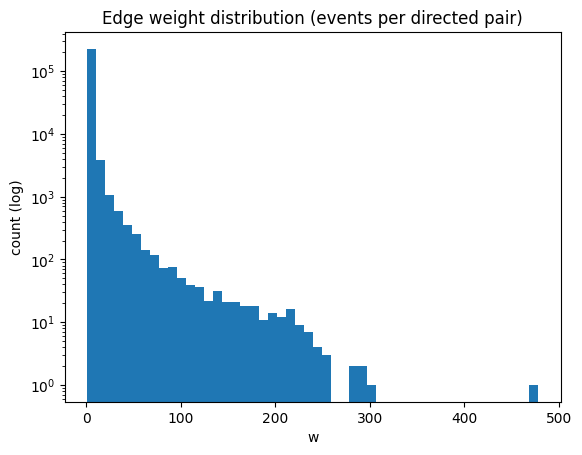

In [10]:
pairs = df.groupby(["SOURCE_SUBREDDIT","TARGET_SUBREDDIT"]).size().rename("w").reset_index()
n = pd.Index(pd.concat([df["SOURCE_SUBREDDIT"], df["TARGET_SUBREDDIT"]]).unique()).size
m_unique = len(pairs)
density = m_unique / (n*(n-1))
print("unique nodes:", n, "unique directed pairs:", m_unique, "density:", density)

plt.figure()
plt.hist(pairs["w"], bins=50)
plt.yscale("log")
plt.title("Edge weight distribution (events per directed pair)")
plt.xlabel("w")
plt.ylabel("count (log)")
plt.show()


B) Co-linked targets within the same post (true “basket co-occurrence”):

For each POST_ID, look at pairs of targets co-mentioned; count co-occurrence pairs

Report top co-occurring target pairs (careful: can blow up; sample if needed)

4) Temporal gaps between “transactions”

Retail meaning: time gaps between purchases
Here: time gaps between posts/edges.

What to report:

Inter-event time distribution globally

Inter-event time per top source subreddit (burstiness)

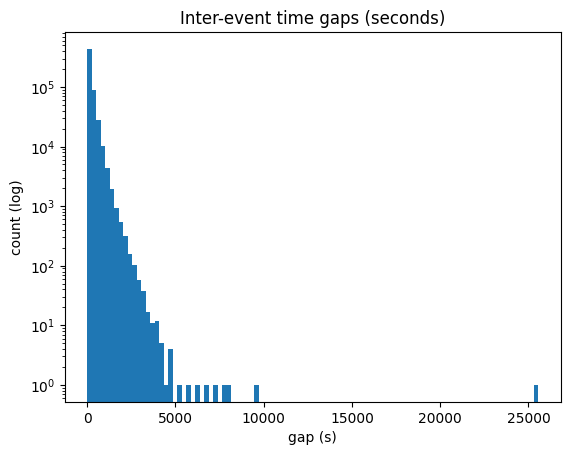

subredditdrama median gap(s): 2399.0 p95 gap(s): 17225.69999999999
bestof median gap(s): 3297.0 p95 gap(s): 16184.199999999997
titlegore median gap(s): 3068.0 p95 gap(s): 44572.000000000015
shitredditsays median gap(s): 9193.0 p95 gap(s): 47189.19999999999
shitpost median gap(s): 9349.5 p95 gap(s): 52521.5


In [11]:
df_sorted = df.sort_values("TIMESTAMP")
gaps = df_sorted["TIMESTAMP"].diff().dt.total_seconds().dropna()

plt.figure()
plt.hist(gaps, bins=100)
plt.yscale("log")
plt.title("Inter-event time gaps (seconds)")
plt.xlabel("gap (s)")
plt.ylabel("count (log)")
plt.show()

# Per-source burstiness (example for top 5 sources)
top5 = df["SOURCE_SUBREDDIT"].value_counts().head(5).index
for s in top5:
    sub = df[df["SOURCE_SUBREDDIT"] == s].sort_values("TIMESTAMP")
    sgaps = sub["TIMESTAMP"].diff().dt.total_seconds().dropna()
    print(s, "median gap(s):", sgaps.median(), "p95 gap(s):", sgaps.quantile(0.95))


5) Signed-label EDA (very important for this dataset)

This is unique signal you should exploit early:

Overall fraction negative vs positive

Negative rate over time (monthly trend)

Which sources/targets have unusually high negative rates (but report aggregates, not “naming and shaming” small nodes)

,fraction
POST_LABEL,
1,0.893098
-1,0.106902


/tmp/ipython-input-4165573344.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["TIMESTAMP"].dt.to_period("M").dt.to_timestamp()


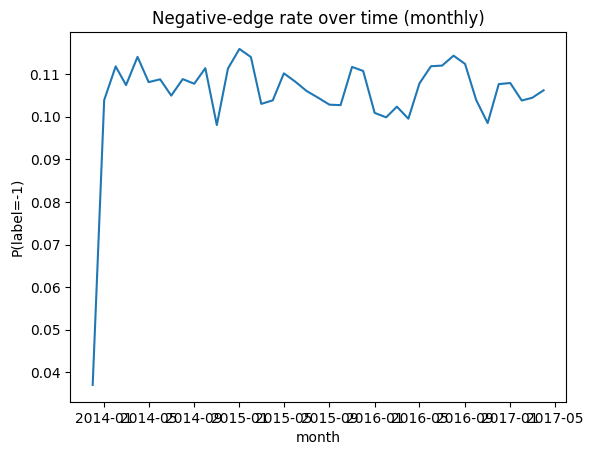

In [12]:
label_counts = df["POST_LABEL"].value_counts(normalize=True)
display(label_counts.to_frame("fraction"))

df["month"] = df["TIMESTAMP"].dt.to_period("M").dt.to_timestamp()
neg_rate_by_month = df.groupby("month")["POST_LABEL"].apply(lambda x: (x == -1).mean())

plt.figure()
plt.plot(neg_rate_by_month.index, neg_rate_by_month.values)
plt.title("Negative-edge rate over time (monthly)")
plt.xlabel("month")
plt.ylabel("P(label=-1)")
plt.show()


Here’s a clean interpretation for the **basket size + top sources/targets** EDA (paste under your plot/tables).

### Basket size per post (unique targets per POST_ID)

* The basket-size histogram is extremely concentrated at **1**: the vast majority of posts link to **exactly one** target subreddit, with only a small fraction linking to **two** targets.
* This suggests hyperlinking behavior is typically **single-target** rather than “multi-item” the way retail baskets are. Practically, it means **co-occurrence inside the same post will be rare**, so co-occurrence-based mining (Apriori-style) would have limited signal here unless we redefine a “basket” (e.g., by user or by time window).

### Top outgoing sources (who links out the most)

* The top sources by outgoing hyperlinks are dominated by discussion/critique/meta communities (e.g., `subredditdrama` 22,971; `bestof` 21,170; `titlegore` 9,500; `shitredditsays` 7,338; `shitpost` 6,657).
* This indicates that a small set of “commentary” subreddits generate a large share of cross-subreddit linking, which likely creates **high out-degree hubs** in the directed graph.

### Top incoming targets (who gets linked to the most)

* The top targets are mostly large, general-interest subreddits (e.g., `askreddit` 19,293; `pics` 9,799; `iama` 9,752; `todayilearned` 8,753; `funny` 8,731).
* This suggests a strong **attention concentration** pattern: many communities link into a common set of mainstream hubs, which can drive PageRank/centrality and produce a clear **core–periphery** structure.

### Why it matters (links to your later methods)

* Because baskets are mostly size 1, the dataset is better viewed as a **directed interaction network over time** rather than a classic transaction dataset.
* The strong hub structure (few heavy sources + few heavy targets) motivates **graph-based methods** (PageRank/HITS, SCC/WCC, temporal snapshots) and supports beyond-course work like **signed link prediction**, where the challenge is not “which items co-occur,” but “which directed connections form and with what sentiment.”


(E) Initial Insights and Direction – Ex:

Observation: Most items appear in fewer than 1% of transactions
Hypothesis: High support thresholds miss meaningful temporal patterns

Potential RQs:
- How do different support thresholds affect rule quality?
- Do sequential patterns reveal structure missed by frequent itemsets?

## (E) Initial Insights and Direction (soc-RedditHyperlinks)

**Observation 1 (basket behavior):** The “basket size” per post is almost always **1** (most posts link to a single target subreddit, with a small minority linking to 2).
**Hypothesis:** Co-occurrence / itemset mining at the *post* level will be weak, so meaningful patterns are more likely to appear when we redefine transactions (e.g., **per subreddit per month**, or **per user/time window**) or when we treat the data primarily as a **directed temporal graph**.

**Observation 2 (extreme sparsity):** The aggregated subreddit graph has **54,075 nodes** but only **234,792 unique directed pairs**, giving density ≈ **8.03e-05**.
**Hypothesis:** Many true relationships are unobserved (missing edges), so purely frequency-based approaches will miss structure; **representation learning / link prediction** should generalize better than counting alone.

**Observation 3 (heavy-tailed repeated interactions):** Edge weights (events per directed pair) are **highly heavy-tailed**: most pairs occur rarely, but a small number repeat **hundreds of times**.
**Hypothesis:** Treating the graph as unweighted will discard strong signal; weighted centrality or models that use interaction strength should better capture “real” cross-subreddit relationships.

**Observation 4 (signed + temporal behavior):** The label distribution is imbalanced (**~89.3% positive vs ~10.7% negative**) and the negative rate is fairly stable over time (≈10–11% monthly, with minor fluctuations).
**Hypothesis:** Any predictive task needs imbalance-aware evaluation (PR-AUC/F1, class weights). The stability suggests negative links are a consistent phenomenon, not just a one-off period effect—so it’s worth modeling explicitly.

---

### Potential Research Questions (at least 3)

1. **Signed link prediction:** Given past interactions between subreddits (and post properties), can we predict whether a future link will be **negative vs positive**? What features matter most: structure (common neighbors/triads), history (past sentiment), or attributes?

2. **Temporal dynamics / change points:** Are there specific time windows where the network’s negativity rate, connectivity (SCC/WCC sizes), or centrality rankings shift significantly? Can change-point detection identify “regime changes” in cross-subreddit interactions?

3. **Core–periphery vs communities:** Is the network better explained by **core–periphery** structure (many link into a few hubs) rather than dense communities? How does this differ across time windows and for negative vs positive edges?

4. **Edge-weight effects:** How different are results when using **weighted** vs **unweighted** graphs (e.g., PageRank on counts vs binary edges)? Do repeated pairs dominate influence/ranking?

